<a href="https://colab.research.google.com/github/abdullahsaqib112/NewsWires-Classification-Reuters-Dataset/blob/main/Classifying_Newswires_Multi_classification_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels)=reuters.load_data(num_words=10000)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [49]:
len(train_data)

8982

In [50]:
len(test_data)

2246

In [51]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results= np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [52]:
def to_one_hot (sequences, dimension=46):
  results=np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1

  return results

one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

In [53]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)

In [56]:
from keras import models
from keras import layers

model= models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [57]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
x_val=x_train[:1000]
partial_x_val = x_train[1000:]

y_val=one_hot_train_labels[:1000]
partial_y_val=one_hot_train_labels[1000:]

In [67]:
history= model.fit(partial_x_val,
                   partial_y_val,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 84ms/step - loss: 3.0403 - accuracy: 0.4544 - val_loss: 1.6604 - val_accuracy: 0.6620
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.4578 - accuracy: 0.6986 - val_loss: 1.2965 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 1s 49ms/step - loss: 1.0582 - accuracy: 0.7662 - val_loss: 1.1348 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 0.8199 - accuracy: 0.8213 - val_loss: 1.0397 - val_accuracy: 0.7800
Epoch 5/20
16/16 [==============================] - 1s 50ms/step - loss: 0.6593 - accuracy: 0.8602 - val_loss: 0.9858 - val_accuracy: 0.7860
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.5100 - accuracy: 0.8963 - val_loss: 0.9275 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.4034 - accuracy: 0.9199 - val_loss: 0.9371 - val_accuracy: 0.8000
Epoch 8/20
16

In [71]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

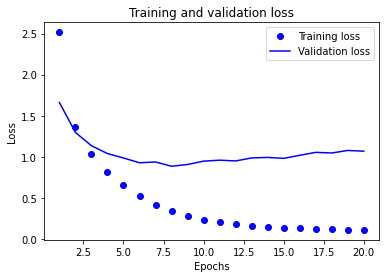

In [68]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

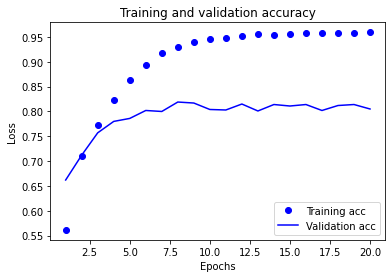

In [72]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()